In [209]:
import numpy as np
import pandas as pd

In [210]:
data = pd.read_csv("Titanic - Titanic.csv")

In [211]:
# exploring data
data.shape

(418, 12)

In [212]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [214]:
# schema
#survived	Survived	0 = No, 1 = Yes
#pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
#sibsp	 of siblings / spouses aboard the Titanic
#parch	# of parents / children aboard the Titanic
#ticket	Ticket number
#fare	Passenger fare
#cabin	Cabin number
#embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [215]:
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [216]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [217]:
# categorical cols
data[['Survived','Pclass']]=data[['Survived','Pclass']].astype("O")

In [221]:
data.dtypes

Survived     object
Pclass       object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [223]:
# check
data['Survived'].unique()

array([0, 1], dtype=object)

In [224]:
data['Pclass'].unique()

array([3, 2, 1], dtype=object)

In [225]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [226]:
data['Age'].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [227]:
data['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [228]:
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Age'>

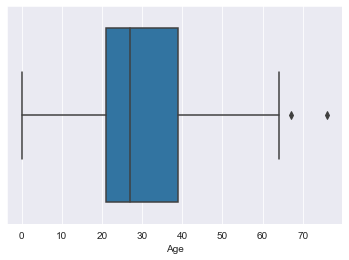

In [229]:
sns.boxplot(data.Age)

<AxesSubplot:xlabel='Age', ylabel='Count'>

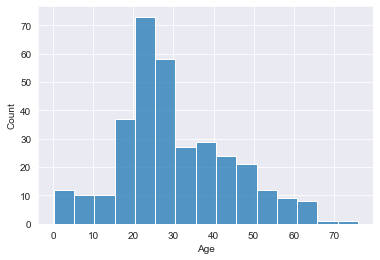

In [230]:
sns.histplot(data.Age)

In [231]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [232]:
data['Age']=data['Age'].astype(int)

In [233]:
data['Age'].unique()

array([34, 47, 62, 27, 22, 14, 30, 26, 18, 21, 46, 23, 63, 24, 35, 45, 55,
        9, 48, 50, 41, 33, 25, 39, 60, 36, 20, 28, 10, 17, 32, 13, 31, 29,
        6, 67, 49,  2, 76, 43, 16,  1, 12, 42, 53, 40, 61,  7, 15, 54, 64,
       37, 11,  8,  0, 38, 57, 19, 58, 59, 44,  5, 51,  3])

In [234]:
data['Age']=data['Age'].replace(0,1)

In [235]:
data['Age'].unique()

array([34, 47, 62, 27, 22, 14, 30, 26, 18, 21, 46, 23, 63, 24, 35, 45, 55,
        9, 48, 50, 41, 33, 25, 39, 60, 36, 20, 28, 10, 17, 32, 13, 31, 29,
        6, 67, 49,  2, 76, 43, 16,  1, 12, 42, 53, 40, 61,  7, 15, 54, 64,
       37, 11,  8, 38, 57, 19, 58, 59, 44,  5, 51,  3])

In [236]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34,0,0,7.8292,Q
1,1,3,female,47,1,0,7.0000,S
2,0,2,male,62,0,0,9.6875,Q
3,0,3,male,27,0,0,8.6625,S
4,1,3,female,22,1,1,12.2875,S


In [237]:
def stag(age):
    if age <10:
        return 0
    elif (age<20) &(age>10):
        return 1
    else:
        return 2

In [238]:
data['survived_stage'] =data['Age'].apply(stag)

In [239]:
data['survived_stage'].unique()

array([2, 1, 0], dtype=int64)

In [240]:
data['survived_stage']=data['survived_stage'].replace({0:'child',1:'teen',2:'old'})

In [241]:
data['survived_stage'].unique()

array(['old', 'teen', 'child'], dtype=object)

In [242]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,survived_stage
0,0,3,male,34,0,0,7.8292,Q,old
1,1,3,female,47,1,0,7.0000,S,old
2,0,2,male,62,0,0,9.6875,Q,old
3,0,3,male,27,0,0,8.6625,S,old
4,1,3,female,22,1,1,12.2875,S,old


In [243]:
con = data['SibSp']+data['Parch']

In [244]:
data['num_fam']=con

In [245]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,survived_stage,num_fam
0,0,3,male,34,0,0,7.8292,Q,old,0
1,1,3,female,47,1,0,7.0000,S,old,1
2,0,2,male,62,0,0,9.6875,Q,old,0
3,0,3,male,27,0,0,8.6625,S,old,0
4,1,3,female,22,1,1,12.2875,S,old,2


In [246]:
def alone(n):
    if n ==0:
        return 0 
    else:
        return 1

In [247]:
data['alone']=data['num_fam'].apply(alone).astype('O')

In [248]:
data['alone'].unique()

array([0, 1], dtype=object)

In [249]:
data.drop(['SibSp','Parch','num_fam','Fare'],axis=1,inplace=True)

In [250]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,survived_stage,alone
0,0,3,male,34,Q,old,0
1,1,3,female,47,S,old,1
2,0,2,male,62,Q,old,0
3,0,3,male,27,S,old,0
4,1,3,female,22,S,old,1


In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Survived        418 non-null    object
 1   Pclass          418 non-null    object
 2   Sex             418 non-null    object
 3   Age             418 non-null    int32 
 4   Embarked        418 non-null    object
 5   survived_stage  418 non-null    object
 6   alone           418 non-null    object
dtypes: int32(1), object(6)
memory usage: 21.4+ KB


In [252]:
import warnings
warnings.simplefilter("ignore")

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

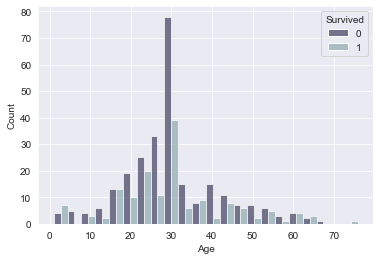

In [254]:
# age vs survived
sns.histplot(x='Age',  hue='Survived', multiple='dodge', data=data,
             palette='bone'
            );

In [255]:
survived_count = data.groupby('Survived')['Survived'].count()
survived_count

Survived
0    266
1    152
Name: Survived, dtype: int64

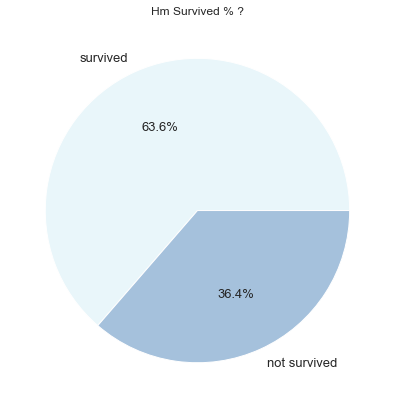

In [256]:
plt.figure(figsize=(7,7))
plt.title('Hm Survived % ?')
colors =['#E9F6FA','#A5C1DC']
plt.pie(survived_count.values, labels=['survived', 'not survived'],colors=colors,
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

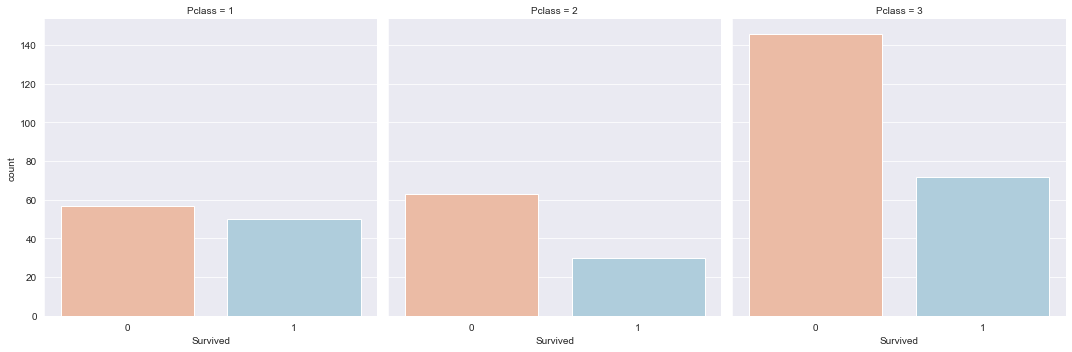

In [257]:
# survived vs pclass
sns.factorplot('Survived', col = 'Pclass', data = data, palette = 'RdBu',
kind = 'count')  

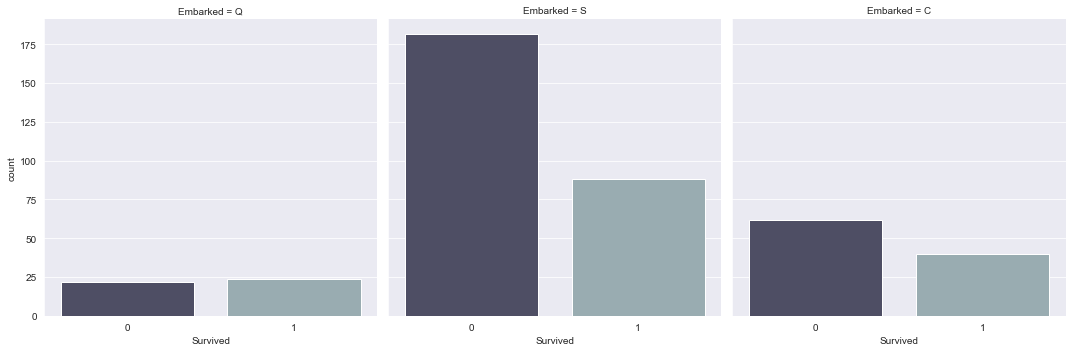

In [258]:
# survived vs embarked
sns.factorplot('Survived', col = 'Embarked', data = data,palette = 'bone',
 kind = 'count')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

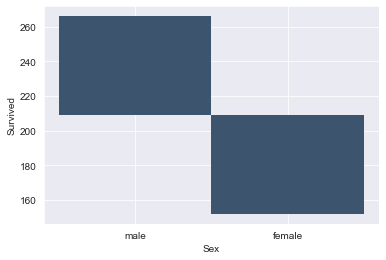

In [259]:
# survived vs sex
sns.histplot(y=survived_count,x='Sex',data=data)

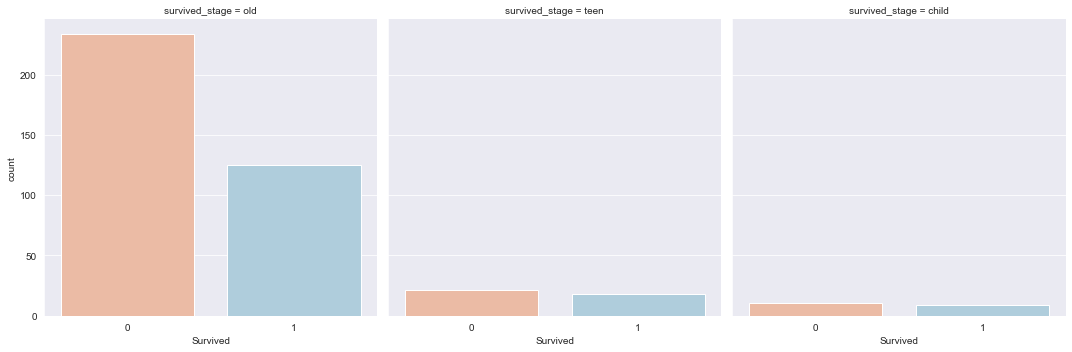

In [260]:
sns.factorplot('Survived', col = 'survived_stage', data = data,palette = 'RdBu',
 kind = 'count')

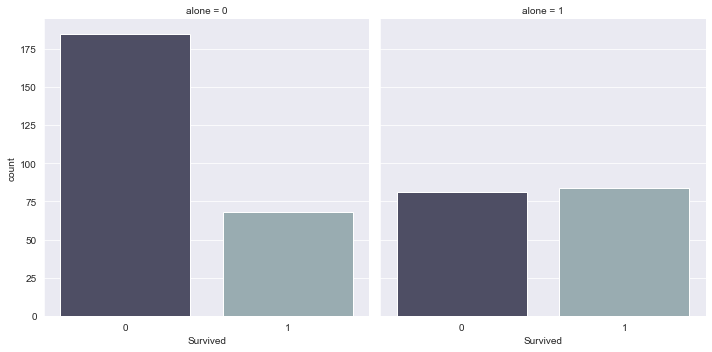

In [261]:
# survived vs with their family
sns.factorplot('Survived', col = 'alone', data = data,palette = 'bone',
 kind = 'count')

In [262]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,survived_stage,alone
0,0,3,male,34,Q,old,0
1,1,3,female,47,S,old,1
2,0,2,male,62,Q,old,0
3,0,3,male,27,S,old,0
4,1,3,female,22,S,old,1


In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Survived        418 non-null    object
 1   Pclass          418 non-null    object
 2   Sex             418 non-null    object
 3   Age             418 non-null    int32 
 4   Embarked        418 non-null    object
 5   survived_stage  418 non-null    object
 6   alone           418 non-null    object
dtypes: int32(1), object(6)
memory usage: 21.4+ KB
